<a href="https://colab.research.google.com/github/Mifekmk/SkillTreePython-DataAnalysis/blob/main/%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_1_%ED%95%B4%EC%99%B8_%EC%B6%95%EA%B5%AC_%EC%84%A0%EC%88%98_%EC%9D%B4%EC%A0%81%EB%A3%8C_%EC%98%88%EC%B8%A1_%EB%AF%B8%EC%85%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/FIFA_train.csv')
df_1 = pd.read_csv('/content/submission.csv')
df.shape # (8932, 12)
df_1.shape # (3828, 2)

(3828, 2)

In [ ]:
df.head() # df는 아직 FA가 끝나지 않은 선수들의 개인정보와 능력치가 기입되어 있습니다.

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5,94,94,4,110500000
1,3,De Gea,27,europe,2020,GK,right,4,91,93,1,72000000
2,7,L. Suarez,31,south america,2021,ST,right,5,91,91,3,80000000
3,8,Sergio Ramos,32,europe,2020,DF,right,4,91,91,3,51000000
4,9,J. Oblak,25,europe,2021,GK,right,3,90,93,1,68000000


In [ ]:
df_1.head() # df_1은 FA이거나 아직 다른 구단의 부름을 받지 못한 선수들의 id가 있습니다.

,id,value
0,1,0
1,2,0
2,4,0
3,5,0
4,6,0


# | 결측치 확인

### * 결측치 개수 확인

In [ ]:
df.isna().sum()

id                  0
name                0
age                 0
continent           0
contract_until      0
position            0
prefer_foot         0
reputation          0
stat_overall        0
stat_potential      0
stat_skill_moves    0
value               0
dtype: int64

In [ ]:
df_1.isna().sum()

id       0
value    0
dtype: int64

# | 기술통계

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                8932 non-null   int64 
 1   name              8932 non-null   object
 2   age               8932 non-null   int64 
 3   continent         8932 non-null   object
 4   contract_until    8932 non-null   object
 5   position          8932 non-null   object
 6   prefer_foot       8932 non-null   object
 7   reputation        8932 non-null   int64 
 8   stat_overall      8932 non-null   int64 
 9   stat_potential    8932 non-null   int64 
 10  stat_skill_moves  8932 non-null   int64 
 11  value             8932 non-null   int64 
dtypes: int64(7), object(5)
memory usage: 837.5+ KB


In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3828 entries, 0 to 3827
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      3828 non-null   int64
 1   value   3828 non-null   int64
dtypes: int64(2)
memory usage: 59.9 KB


# | 숫자 자료형의 기술통계

In [ ]:
df.describe()

,id,age,reputation,stat_overall,stat_potential,stat_skill_moves,value
count,8932.000000,8932.000000,8932.000000,8932.000000,8932.000000,8932.000000,8.932000e+03
mean,7966.775750,25.209136,1.130878,67.091133,71.997201,2.401702,2.778673e+06
std,4844.428521,4.635515,0.423792,6.854910,5.988147,0.776048,5.840982e+06
min,0.000000,16.000000,1.000000,47.000000,48.000000,1.000000,1.000000e+04
25%,3751.750000,21.000000,1.000000,63.000000,68.000000,2.000000,3.750000e+05
50%,7696.500000,25.000000,1.000000,67.000000,72.000000,2.000000,8.250000e+05
75%,12082.250000,28.000000,1.000000,72.000000,76.000000,3.000000,2.600000e+06
max,16948.000000,40.000000,5.000000,94.000000,94.000000,5.000000,1.105000e+08


In [ ]:
df_1.describe()

,id,value
count,3828.000000,3828.0
mean,7846.258098,0.0
std,4870.339361,0.0
min,1.000000,0.0
25%,3466.250000,0.0
50%,7643.500000,0.0
75%,11967.000000,0.0
max,16943.000000,0.0


* 숫자 자료형 외의 기술 통계

In [ ]:
df.describe(include='object')

,name,continent,contract_until,position,prefer_foot
count,8932,8932,8932,8932,8932
unique,8932,5,17,4,2
top,L. Messi,europe,2019,MF,right
freq,1,5322,2366,3428,6837


In [ ]:
for col in ['name', 'continent', 'contract_until','position', 'prefer_foot']:
    print(col)
    print(df[col].value_counts())

name
L. Messi              1
S. Tanabe             1
P. Wiegers            1
P. Breitkreuz         1
K. Rendón             1
                     ..
P. Álvarez            1
B. Urribarri          1
D. Larsson            1
S. Delev              1
N. Christoffersson    1
Name: name, Length: 8932, dtype: int64
continent
europe           5322
south america    1927
asia              787
africa            721
oceania           175
Name: continent, dtype: int64
contract_until
2019         2366
2021         2308
2020         2041
2022          761
2023          506
30-Jun-19     501
2018          327
31-Dec-18      64
31-May-19      19
2024           12
31-Jan-19      10
30-Jun-20       9
2025            3
01-Jan-19       2
2026            1
31-May-20       1
12-Jan-19       1
Name: contract_until, dtype: int64
position
MF    3428
DF    2791
ST    1705
GK    1008
Name: position, dtype: int64
prefer_foot
right    6837
left     2095
Name: prefer_foot, dtype: int64


In [ ]:
df.columns

Index(['id', 'name', 'age', 'continent', 'contract_until', 'position',
       'prefer_foot', 'reputation', 'stat_overall', 'stat_potential',
       'stat_skill_moves', 'value'],
      dtype='object')

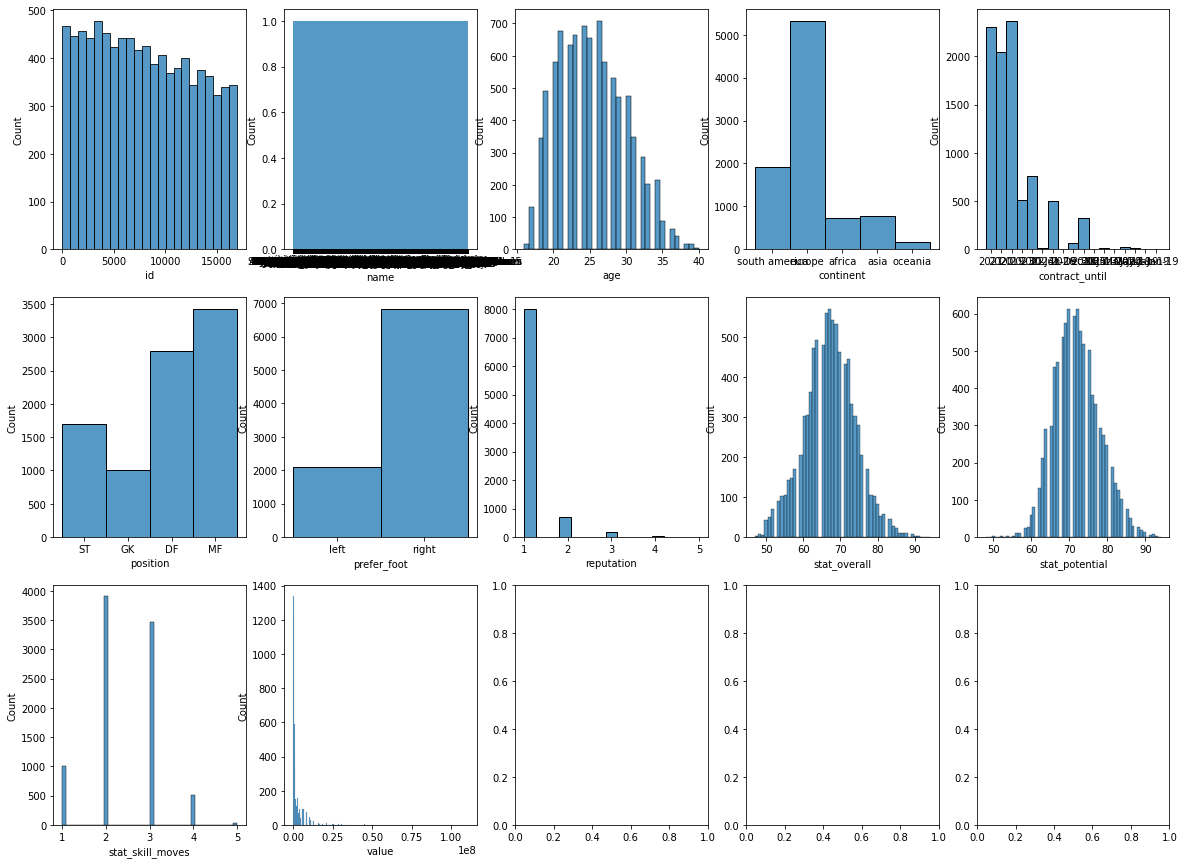

In [ ]:
f, axes = plt.subplots(3,5, figsize=(20,15))
axes = axes.flatten()
# x=df.astype(np.float32)
# y=y.astype(np.float32)
for col, ax in zip(df.columns, axes):
    sns.histplot(data=df, x=col, ax=ax)
plt.show()

In [ ]:
noms = ['continent','position','prefer_foot','reputation','stat_skill_moves']
nums = ['id','age','stat_overall']
y= 'value'
print('이산형 자료 : ', noms)
print('연속형 자료 : ', nums)

print('예상치 : ', 'value')

이산형 자료 :  ['continent', 'position', 'prefer_foot', 'reputation', 'stat_skill_moves']
연속형 자료 :  ['id', 'age', 'stat_overall']
예상치 :  value


In [ ]:
df_1.columns

Index(['id', 'value'], dtype='object')

In [ ]:
df_1_nums = ['id']
df_1_y = 'value'
print('연속형 자료 : ', df_1_nums)
print('예상치 : ', 'value')

연속형 자료 :  ['id']
예상치 :  value


* 데이터 정리하기
  * 데이터 소개: 유럽 5대 리그 선수의 시작가격과 능력치 사이의 상관성을 알아봐주세요.
  * 자료형 소개
  * 모델링을 위한 자료형 구분: 
   * 이산형 자료 :  ['continent', 'position', 'prefer_foot', 'reputation', 'stat_skill_moves']
   * 연속형 자료 :  ['id', 'age', 'stat_overall']
   * 예상치 :  value
   ---
   * 연속형 자료 :  ['id']
   * 예상치 :  value
   ---
   * 이산형 자료 :  ['continent', 'position', 'prefer_foot', 'reputation', 'stat_skill_moves']
   * 연속형 자료 :  ['id', 'age', 'stat_overall']
   * 예상치 :  value

# | 데이터 분포 시각화

* 연속 자료형 분포 그리기

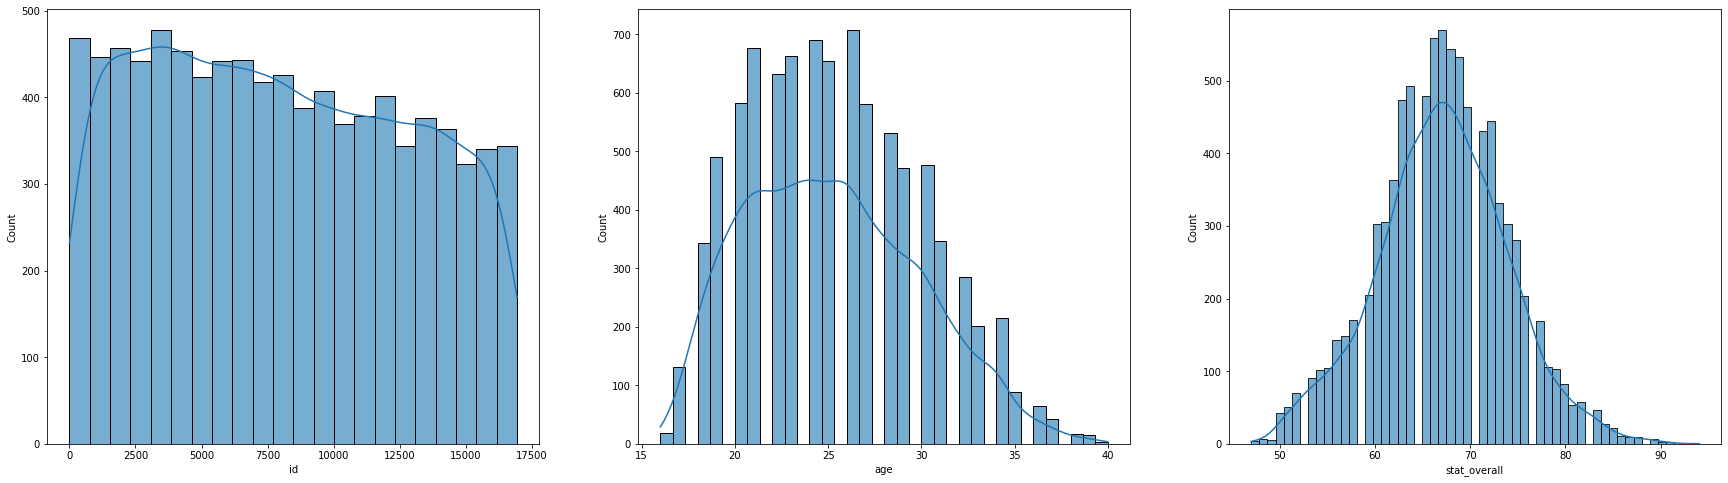

In [ ]:
f, axes = plt.subplots(1,len(nums), figsize=(30,8))
axes = axes.flatten()
for col,ax in zip(nums, axes):
    sns.histplot(data = df, x=col, ax=ax, alpha=0.6, kde=True)
plt.show()

### 아직 구단에서 가치를 측정한 선수들의 연속형 자료(id, age, stat_overall) 그래프입니다. 

* 이산 자료형 분포 그리기

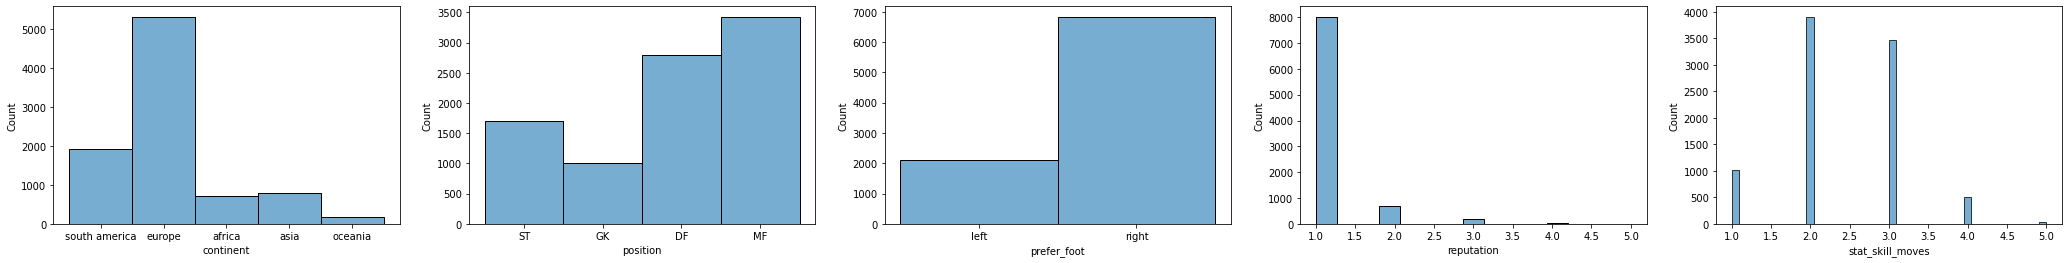

In [ ]:
f, axes = plt.subplots(1,len(noms), figsize=(36,4))
axes = axes.flatten()
for col,ax in zip(noms, axes):
    sns.histplot(data = df, x=col, ax=ax, alpha=0.6,)
    # 범주값의 경우 countplot으로 만드는게 좋습니다.
plt.show()

### 구단에서 몸값을 측정한 선수들의 이산형 자료(continent, position, prefer_foot, reputation, stat_skill_moves)의 값들 입니다.

# | 기술 통계량 시각화

* boxplot 으로 연속 자료형 기술 통계 시각화하기

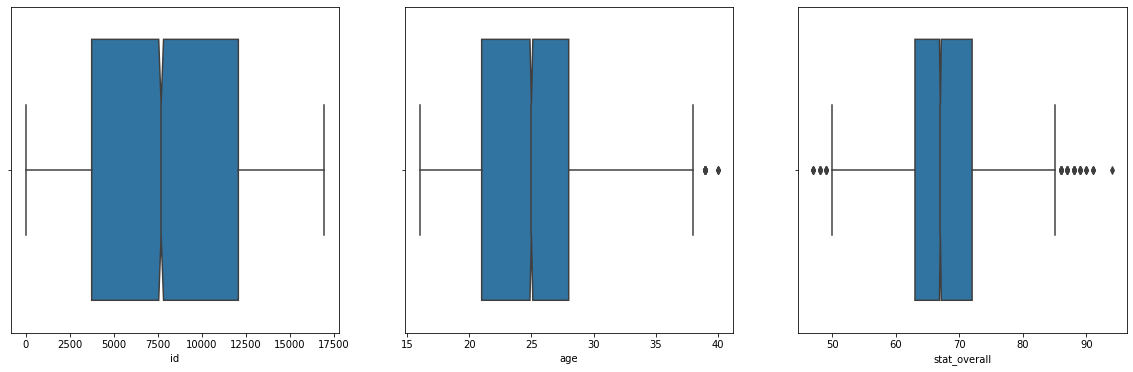

In [ ]:
f, axes = plt.subplots(1,len(nums), figsize=(20,6))
axes = axes.flatten()
for col,ax in zip(nums, axes):
    sns.boxplot(data = df, x=col, ax=ax, notch=1, sym='rs')
plt.show()

### age와 stat_overall에서 이상치가 발견되었습니다.

* viloinplot 으로 연속 자료형 기술 통계 시각화하기

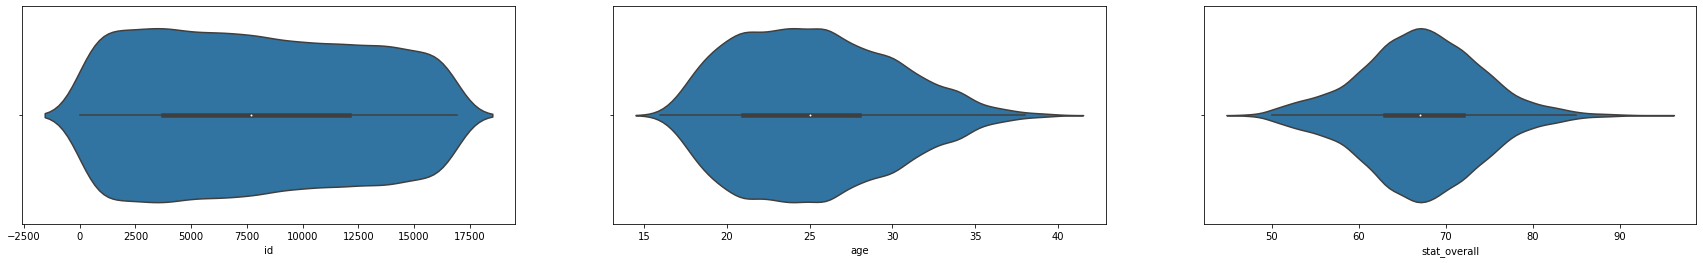

In [ ]:
f, axes = plt.subplots(1,len(nums), figsize=(30,4))
axes = axes.flatten()
for col,ax in zip(nums, axes):
    sns.violinplot(data = df, x=col, ax=ax, )
plt.show()

# | 왜도와 첨도

* `skew` 이용해 왜도 구하기

In [ ]:
df.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


id                  0.131143
age                 0.356824
reputation          3.774495
stat_overall        0.026723
stat_potential      0.285905
stat_skill_moves    0.086536
value               5.885798
dtype: float64

##### 왜도는 분포의 비대칭성을 나타내는 척도입니다. 
왜도 값이 양의 값을 가지면 정규분포보다 왼쪽으로 치우쳐져 있고, 꼬리는 오른쪽으로 길어지게 표현됩니다.


* `kurt` 이용해 첨도 구하기

In [ ]:
df.kurt()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


id                  -1.163769
age                 -0.525774
reputation          16.321376
stat_overall         0.111971
stat_potential       0.055385
stat_skill_moves    -0.155418
value               52.050515
dtype: float64

##### 샘플의 점수가 평균을 중심으로 가까이 몰려 있을수록 분포의 정점은 더욱 뾰족한 모양, 즉 첨도가 커지게 됩니다.

# | 예측값에 대한 추가 시각화

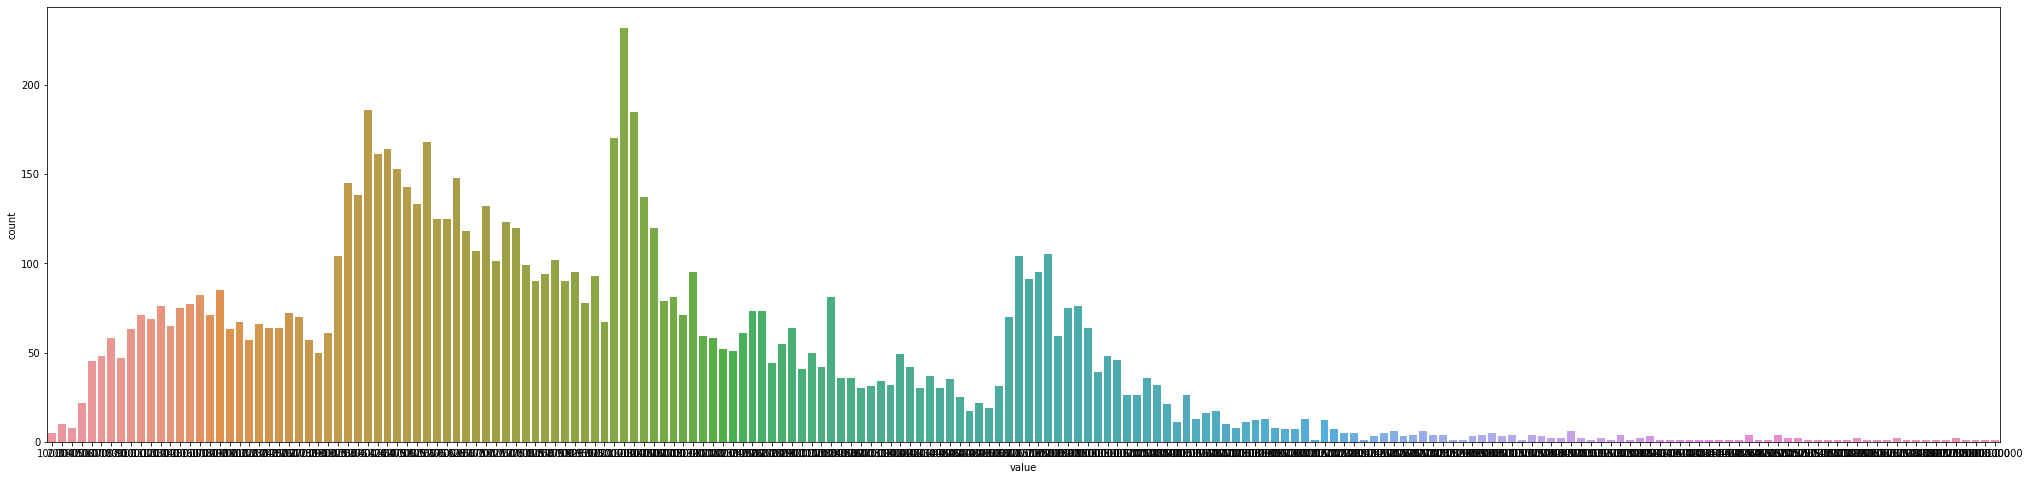

In [ ]:
plt.figure(figsize=(35,8))
sns.countplot(data=df, x=y)
plt.show()

In [ ]:
df.value

0       110500000
1        72000000
2        80000000
3        51000000
4        68000000
          ...    
8927        60000
8928        40000
8929        50000
8930        50000
8931        60000
Name: value, Length: 8932, dtype: int64

In [ ]:
df.corr()

,id,age,reputation,stat_overall,stat_potential,stat_skill_moves,value
id,1.000000,-0.475785,-0.423739,-0.972374,-0.630199,-0.402455,-0.544280
age,-0.475785,1.000000,0.263468,0.467345,-0.231303,0.039362,0.087319
reputation,-0.423739,0.263468,1.000000,0.521389,0.399183,0.196582,0.665982
stat_overall,-0.972374,0.467345,0.521389,1.000000,0.665453,0.400164,0.658444
stat_potential,-0.630199,-0.231303,0.399183,0.665453,1.000000,0.332578,0.611907
stat_skill_moves,-0.402455,0.039362,0.196582,0.400164,0.332578,1.000000,0.298500
value,-0.544280,0.087319,0.665982,0.658444,0.611907,0.298500,1.000000


In [ ]:
df.corr().style.background_gradient(cmap='Blues')

,id,age,reputation,stat_overall,stat_potential,stat_skill_moves,value
id,1.000000,-0.475785,-0.423739,-0.972374,-0.630199,-0.402455,-0.544280
age,-0.475785,1.000000,0.263468,0.467345,-0.231303,0.039362,0.087319
reputation,-0.423739,0.263468,1.000000,0.521389,0.399183,0.196582,0.665982
stat_overall,-0.972374,0.467345,0.521389,1.000000,0.665453,0.400164,0.658444
stat_potential,-0.630199,-0.231303,0.399183,0.665453,1.000000,0.332578,0.611907
stat_skill_moves,-0.402455,0.039362,0.196582,0.400164,0.332578,1.000000,0.298500
value,-0.544280,0.087319,0.665982,0.658444,0.611907,0.298500,1.000000


###### 상관관계 분석을 통해서 선수 가치에 많은 영향을 줄 수 있는 데이터들을 찾을 수 있습니다. 상대적으로 선수의 명성도와 현재 능력치와 앞으로의 발전 정도가 상관관계가 높은 평이었으나, 이것만 보기에는 애매한 감이 있습니다.
또한 의외로 나이에 대한 가치 기대값이 낮은 것을 알 수 있었습니다. 
##### 축구구단도 이윤을 추구해야하는 축구사업이기 때문에 이름값과 그에 맞는 현재 폼이 선수 가치에 많은 영향을 주지 않았나 생각이 듭니다.

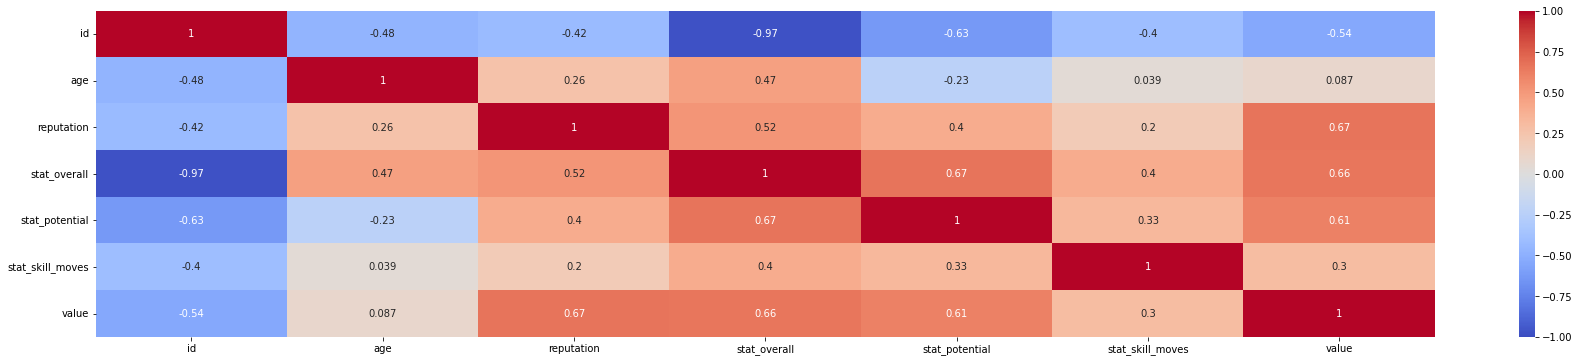

In [ ]:
plt.figure(figsize=(30,6))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, vmin=-1, vmax=1)
plt.show()

## | 속성간 관계 시각화

* `pairplot` 이용해 시각화 하기

<Figure size 2592x2592 with 0 Axes>

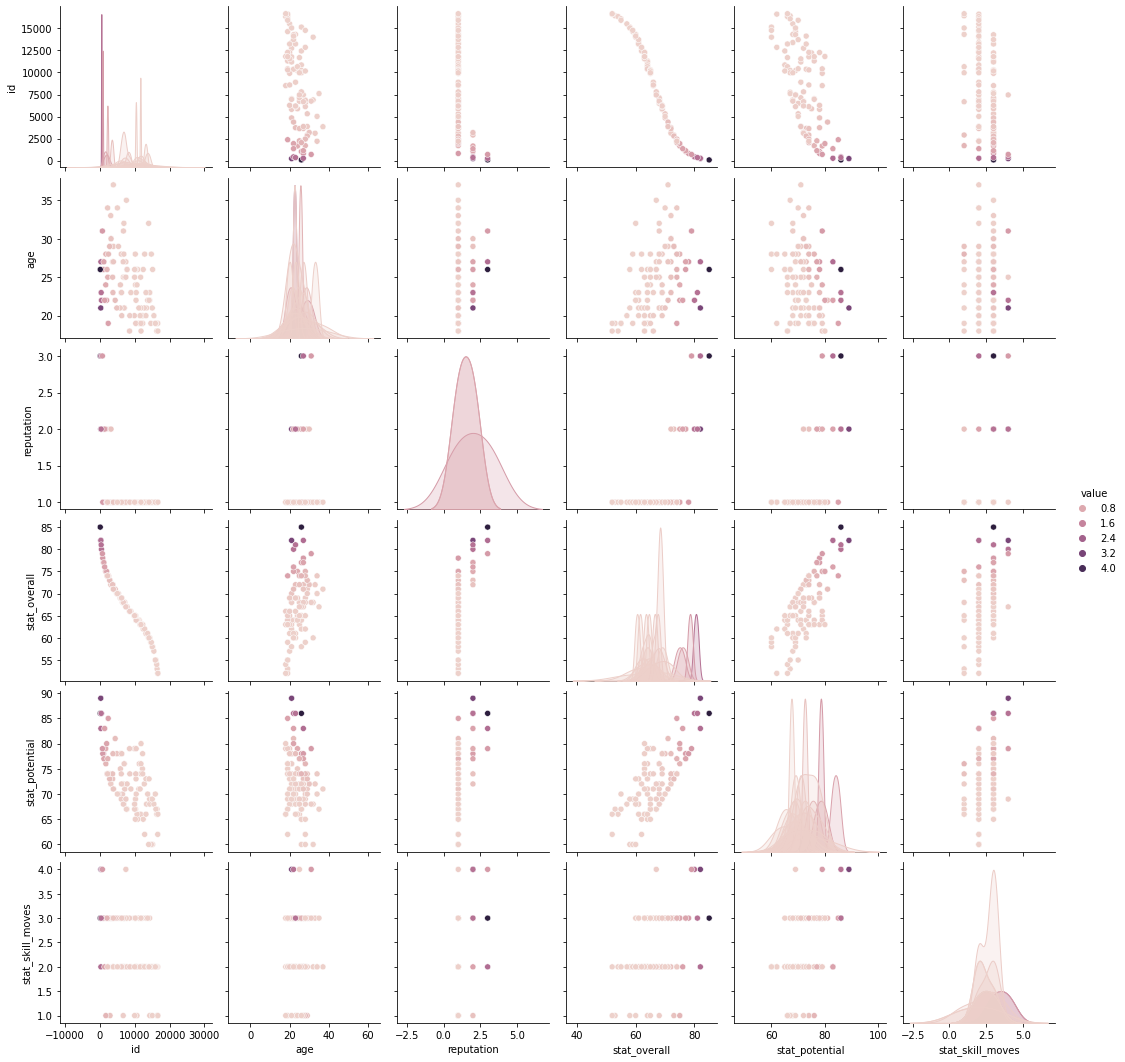

In [ ]:
plt.figure(figsize=(36,36))
sns.pairplot(df.sample(100), hue='value')

* `displot` 이용해 연속 자료형 별 예측값의 분포 `kde` 선으로 시각화 하기 

In [ ]:
df.columns

Index(['id', 'name', 'age', 'continent', 'contract_until', 'position',
       'prefer_foot', 'reputation', 'stat_overall', 'stat_potential',
       'stat_skill_moves', 'value'],
      dtype='object')

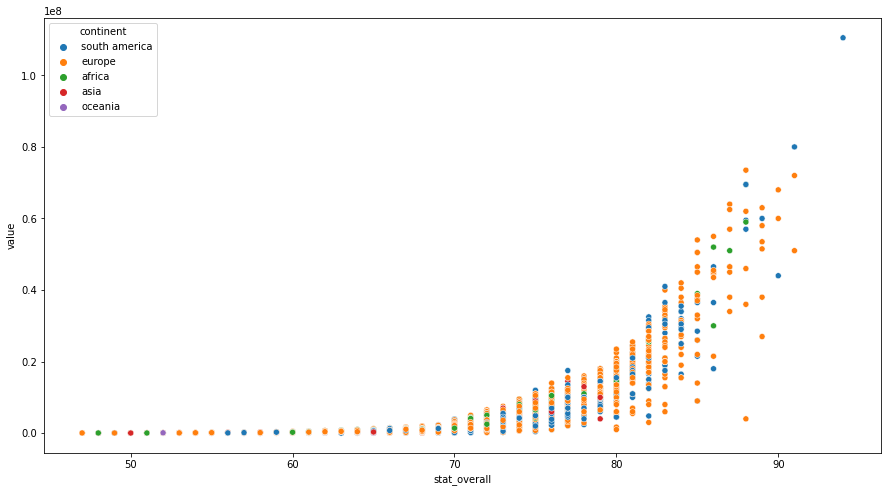

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df, x='stat_overall', y ='value',hue='continent')

##### 현재의 실력과 선수 가치를 국가별로 나누어 보았습니다. europe을 뜻하는 노란색 점이 많이 보이고, 파란색이 다음으로 많이 보입니다.

<Figure size 1080x576 with 0 Axes>

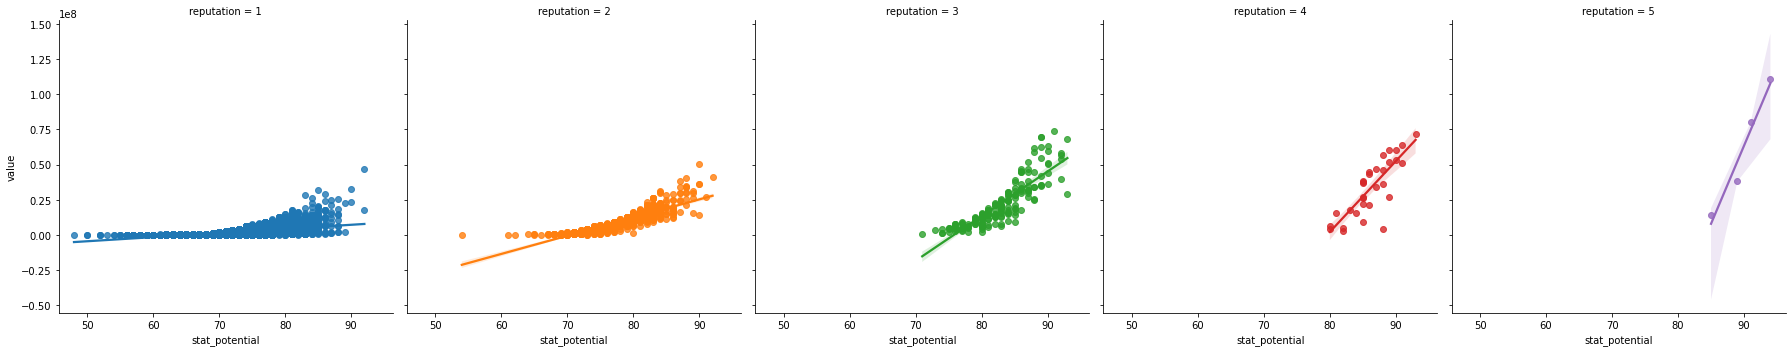

In [ ]:
plt.figure(figsize=(15,8))
sns.lmplot(data=df, x='stat_potential', y ='value',col='reputation',hue='reputation')

##### 앞으로의 포텐셜과 선수의 가치, 명성을 비교해 본 결과, 명성이 높을수록 가파르게 비례하고 명성이 낮아질수록 눈에 띄게 상관관계가 덜어지는 것을 알 수 있었습니다.

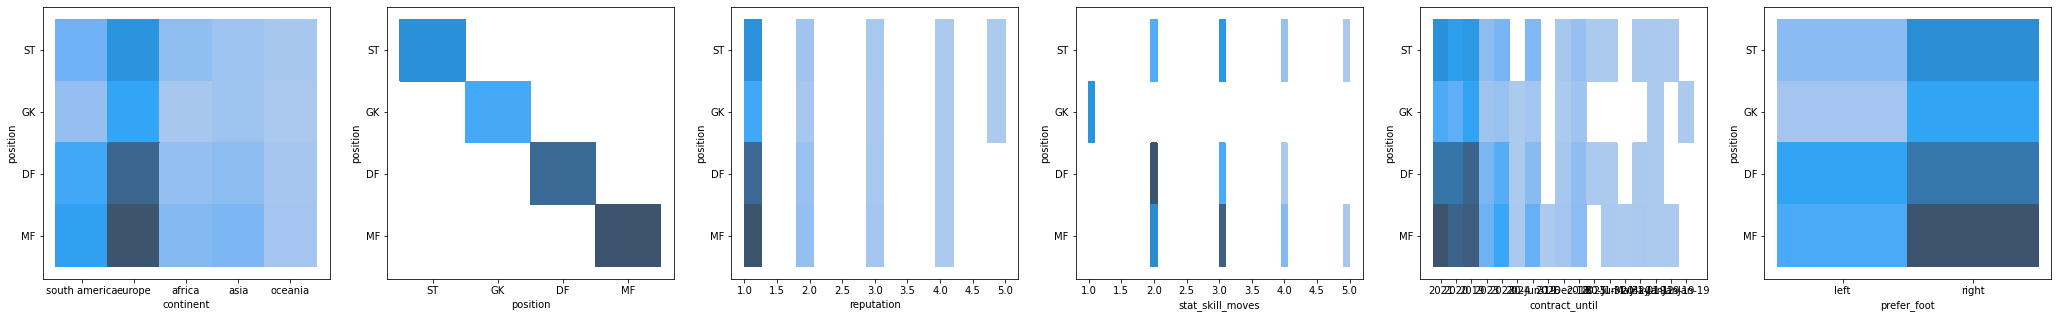

In [ ]:
fig, axes = plt.subplots(1, len(noms), figsize=(36,5))
for col, ax in zip(noms, axes):
    _=sns.histplot(data=df, x=col, y='position' ,ax=ax)
# 범주형 + 범주형 끼리의 히스토플롯을 작성하였습니다.

##### 지금까지 선수의 시장가격과 능력치 사이의 상관성을 알아보았습니다. 이를 토대로 선수 몸값과 0원인 선수들이 앞으로 시장에서 얼마나 높은 가치를 가질 수 있는지 분석해 보겠습니다.

In [ ]:
df2=pd.read_csv('/content/FIFA_test.csv')

In [ ]:
df2.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,1,Cristiano Ronaldo,33,europe,2022,ST,right,5.0,94,94,5.0
1,2,Neymar Jr,26,south america,2022,ST,right,5.0,92,93,5.0
2,4,K. De Bruyne,27,europe,2023,MF,right,4.0,91,92,4.0
3,5,E. Hazard,27,europe,2020,ST,right,4.0,91,91,4.0
4,6,L. Modrić,32,europe,2020,MF,right,4.0,91,91,4.0


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3828 entries, 0 to 3827
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                3828 non-null   int64  
 1   name              3828 non-null   object 
 2   age               3828 non-null   int64  
 3   continent         3828 non-null   object 
 4   contract_until    3828 non-null   object 
 5   position          3828 non-null   object 
 6   prefer_foot       3828 non-null   object 
 7   reputation        3828 non-null   float64
 8   stat_overall      3828 non-null   int64  
 9   stat_potential    3828 non-null   int64  
 10  stat_skill_moves  3828 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 329.1+ KB


In [ ]:
df2.isna().sum() # 결측치의 개수를 확인하였습니다.

id                  0
name                0
age                 0
continent           0
contract_until      0
position            0
prefer_foot         0
reputation          0
stat_overall        0
stat_potential      0
stat_skill_moves    0
dtype: int64

In [ ]:
df2.describe()

,id,age,reputation,stat_overall,stat_potential,stat_skill_moves
count,3828.000000,3828.000000,3828.000000,3828.000000,3828.000000,3828.000000
mean,7846.258098,25.297806,1.143939,67.336991,72.107628,2.414838
std,4870.339361,4.628236,0.448465,6.908814,6.133428,0.781153
min,1.000000,16.000000,1.000000,47.000000,52.000000,1.000000
25%,3466.250000,22.000000,1.000000,63.000000,68.000000,2.000000
50%,7643.500000,25.000000,1.000000,67.000000,72.000000,2.000000
75%,11967.000000,29.000000,1.000000,72.000000,76.000000,3.000000
max,16943.000000,42.000000,5.000000,94.000000,95.000000,5.000000


In [ ]:
df2.describe(include='object')

,name,continent,contract_until,position,prefer_foot
count,3828,3828,3828,3828,3828
unique,3828,5,18,4,2
top,Cristiano Ronaldo,europe,2021,MF,right
freq,1,2269,985,1431,2915


* 숫자 자료형 외 값 및 개수 확인

In [ ]:
for col in ['name', 'continent', 'contract_until', 'position', 'prefer_foot']:
    print(col)
    print(df2[col].value_counts())

name
Cristiano Ronaldo    1
N. Karger            1
Mairdel Sampaio      1
H. Akpan             1
J. Faucher           1
                    ..
C. Strohdiek         1
J. Brabec            1
I. Uche              1
R. Ovelar            1
K. Fujikawa          1
Name: name, Length: 3828, dtype: int64
continent
europe           2269
south america     838
asia              350
africa            294
oceania            77
Name: continent, dtype: int64
contract_until
2021            985
2019            943
2020            882
2022            338
2023            251
Jun 30, 2019    209
2018            155
Dec 31, 2018     34
May 31, 2019     14
2025              4
Jun 30, 2020      4
2024              2
Jan 31, 2019      2
Jan 1, 2019       1
May 31, 2020      1
Jun 1, 2019       1
Dec 31, 2019      1
2026              1
Name: contract_until, dtype: int64
position
MF    1431
DF    1270
ST     717
GK     410
Name: position, dtype: int64
prefer_foot
right    2915
left      913
Name: prefer_foot, dt

* 모든 속성의 분포 간단히 그리기

In [ ]:
df2.columns

Index(['id', 'name', 'age', 'continent', 'contract_until', 'position',
       'prefer_foot', 'reputation', 'stat_overall', 'stat_potential',
       'stat_skill_moves'],
      dtype='object')

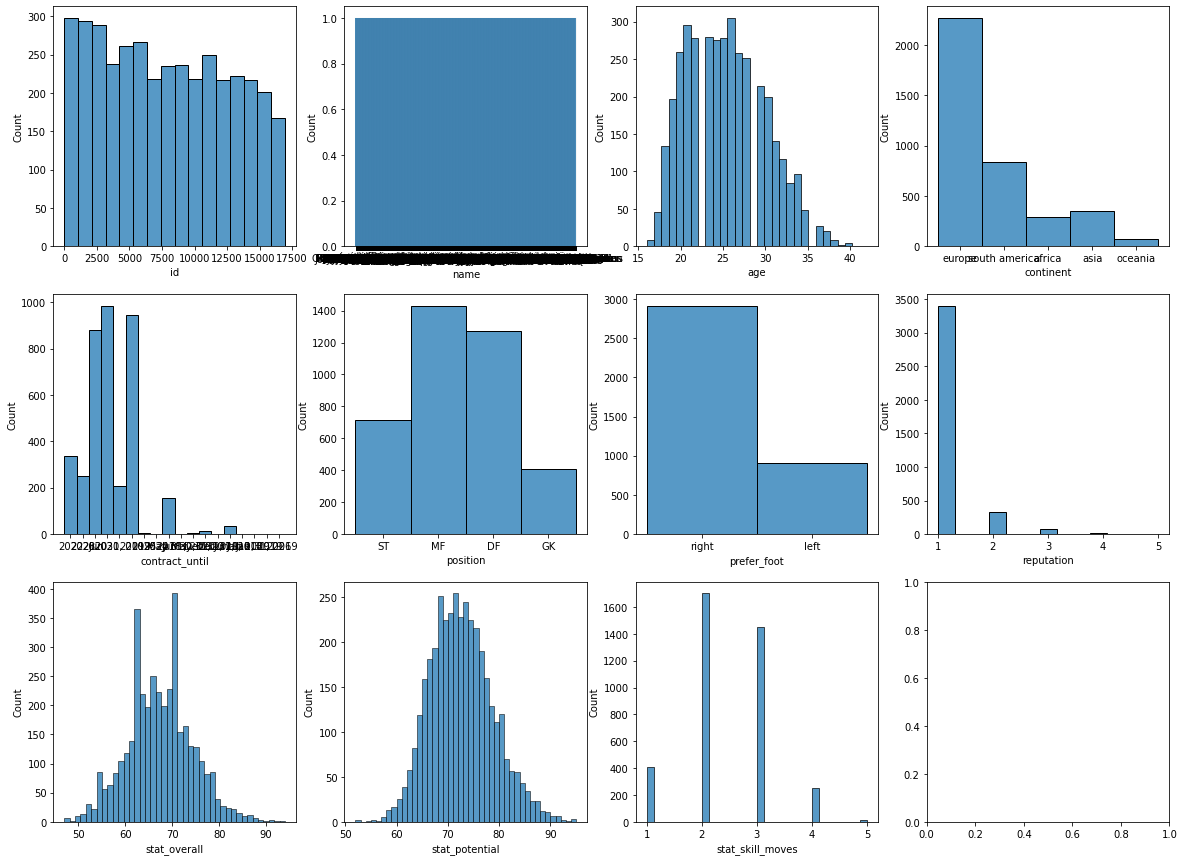

In [ ]:
f, axes = plt.subplots(3,4, figsize=(20,15))
axes = axes.flatten()
# x=df.astype(np.float32)
# y=y.astype(np.float32)
for col, ax in zip(df2.columns, axes):
    sns.histplot(data=df2, x=col, ax=ax)
plt.show()

In [ ]:
noms = ['continent','position','reputation','stat_skill_moves','contract_until','prefer_foot']
nums = ['id','age','stat_overall','stat_potential']
y= 'reputation'
print('이산형 자료 : ', noms)
print('연속형 자료 : ', nums)

print('예상치 : ', 'reputation')

이산형 자료 :  ['continent', 'position', 'reputation', 'stat_skill_moves', 'contract_until', 'prefer_foot']
연속형 자료 :  ['id', 'age', 'stat_overall', 'stat_potential']
예상치 :  reputation


* 데이터 정리하기
  * 데이터 소개: 유럽 5대 리그 선수의 시작가격과 능력치 사이의 상관성을 알아봐주세요.
  * 자료형 소개
  * 모델링을 위한 자료형 구분: 
   * 이산형 자료 :  ['continent', 'position',  'reputation', 'stat_skill_moves']
   * 연속형 자료 :  ['id', 'age', 'contract_until', 'stat_overall', 'stat_potential','prefer_foot']
   * 예상치 :  reputation


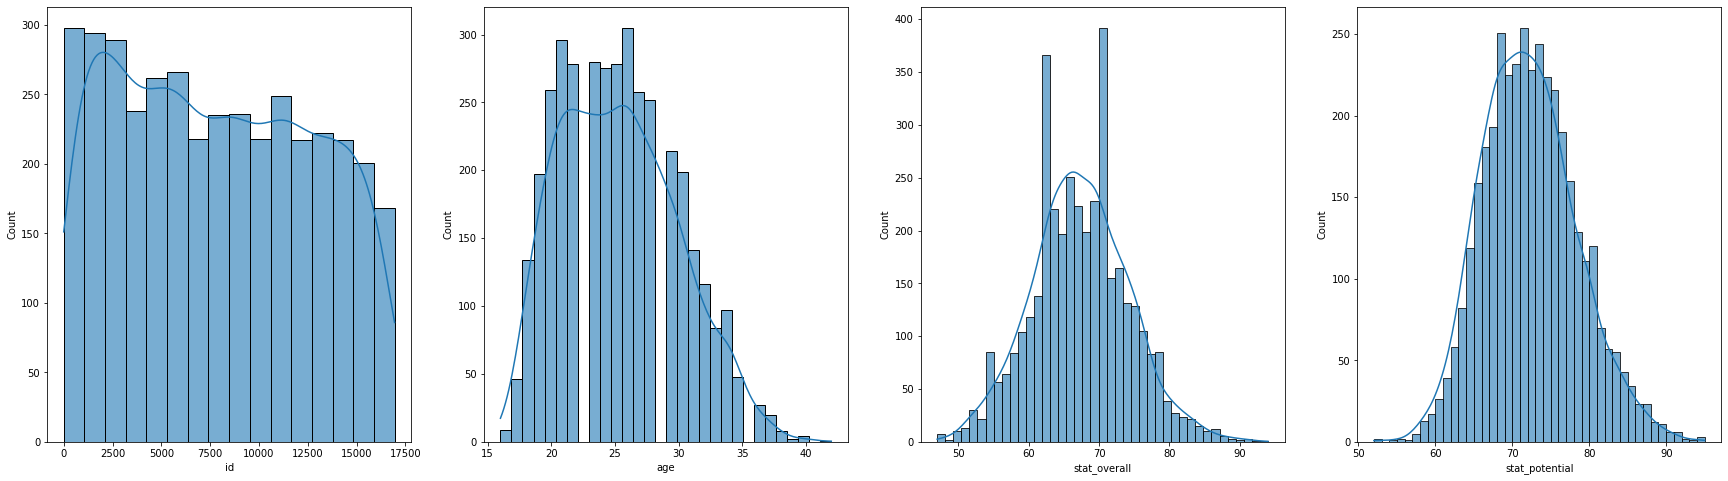

In [ ]:
f, axes = plt.subplots(1,len(nums), figsize=(30,8))
axes = axes.flatten()
for col,ax in zip(nums, axes):
    sns.histplot(data = df2, x=col, ax=ax, alpha=0.6, kde=True)
plt.show()

### 가치가 0원인 선수들의 연속형 자료입니다.

* 이산 자료형 분포 그리기

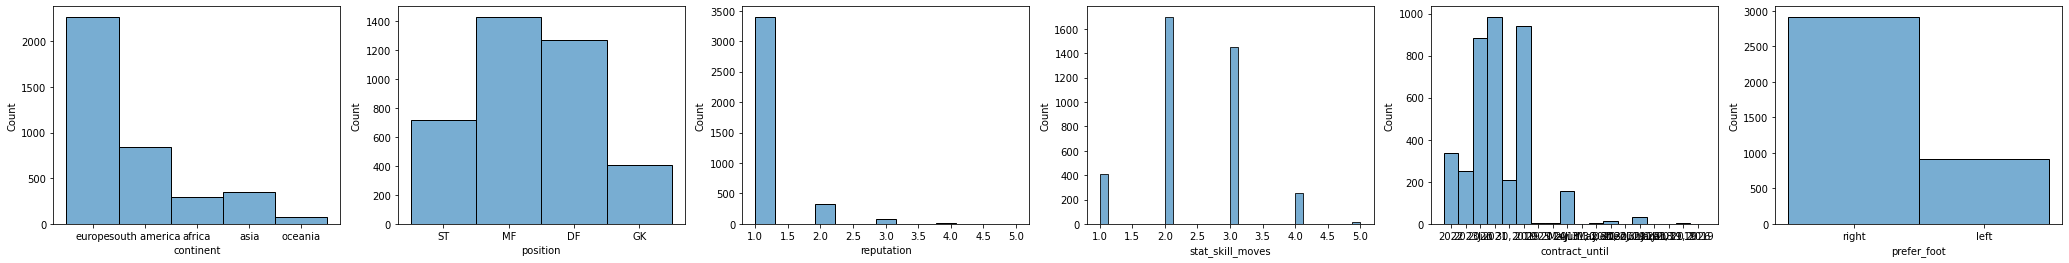

In [ ]:
f, axes = plt.subplots(1,len(noms), figsize=(36,4))
axes = axes.flatten()
for col,ax in zip(noms, axes):
    sns.histplot(data = df2, x=col, ax=ax, alpha=0.6,)
    # 범주값의 경우 countplot으로 만드는게 좋습니다.
plt.show()

### 몸값을 0원으로 측정한 선수들의 이산형 자료(continent, position, prefer_foot, reputation, stat_skill_moves)의 값들 입니다.

# | 기술 통계량 시각화

* boxplot 으로 연속 자료형 기술 통계 시각화하기

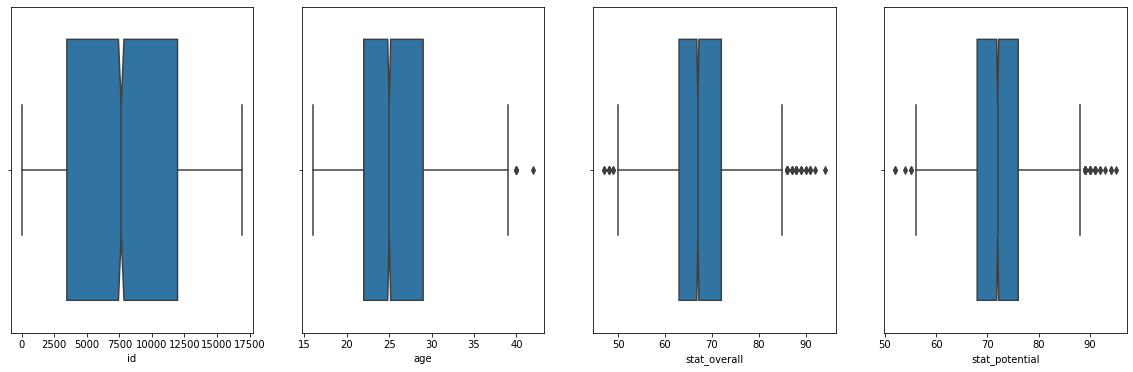

In [ ]:
f, axes = plt.subplots(1,len(nums), figsize=(20,6))
axes = axes.flatten()
for col,ax in zip(nums, axes):
    sns.boxplot(data = df2, x=col, ax=ax, notch=1, sym='rs')
plt.show()

* viloinplot 으로 연속 자료형 기술 통계 시각화하기

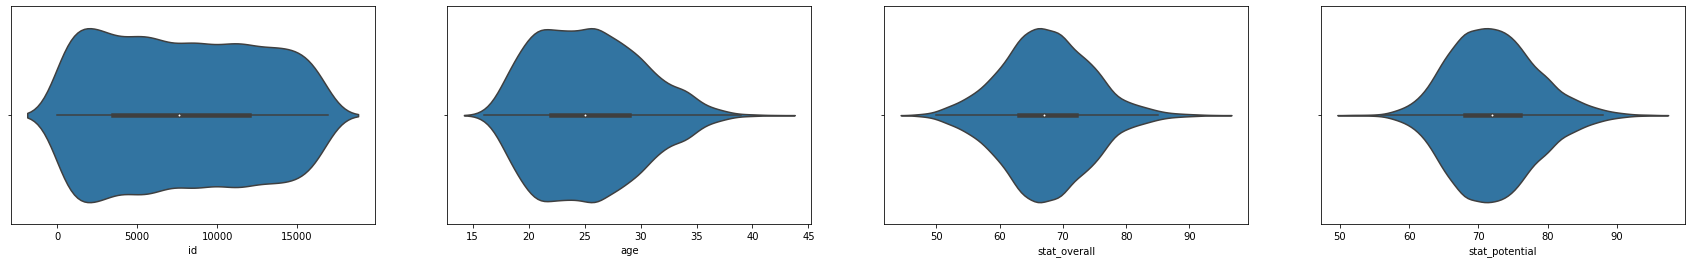

In [ ]:
f, axes = plt.subplots(1,len(nums), figsize=(30,4))
axes = axes.flatten()
for col,ax in zip(nums, axes):
    sns.violinplot(data = df2, x=col, ax=ax, )
plt.show()

### **| 왜도와 첨도**

* `skew` 이용해 왜도 구하기

In [ ]:
df.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


id                  0.131143
age                 0.356824
reputation          3.774495
stat_overall        0.026723
stat_potential      0.285905
stat_skill_moves    0.086536
value               5.885798
dtype: float64

* `kurt` 이용해 첨도 구하기

In [ ]:
df.kurt()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


id                  -1.163769
age                 -0.525774
reputation          16.321376
stat_overall         0.111971
stat_potential       0.055385
stat_skill_moves    -0.155418
value               52.050515
dtype: float64

### **| 예측값에 대한 추가 시각화**

* `countplot`으로 그리기

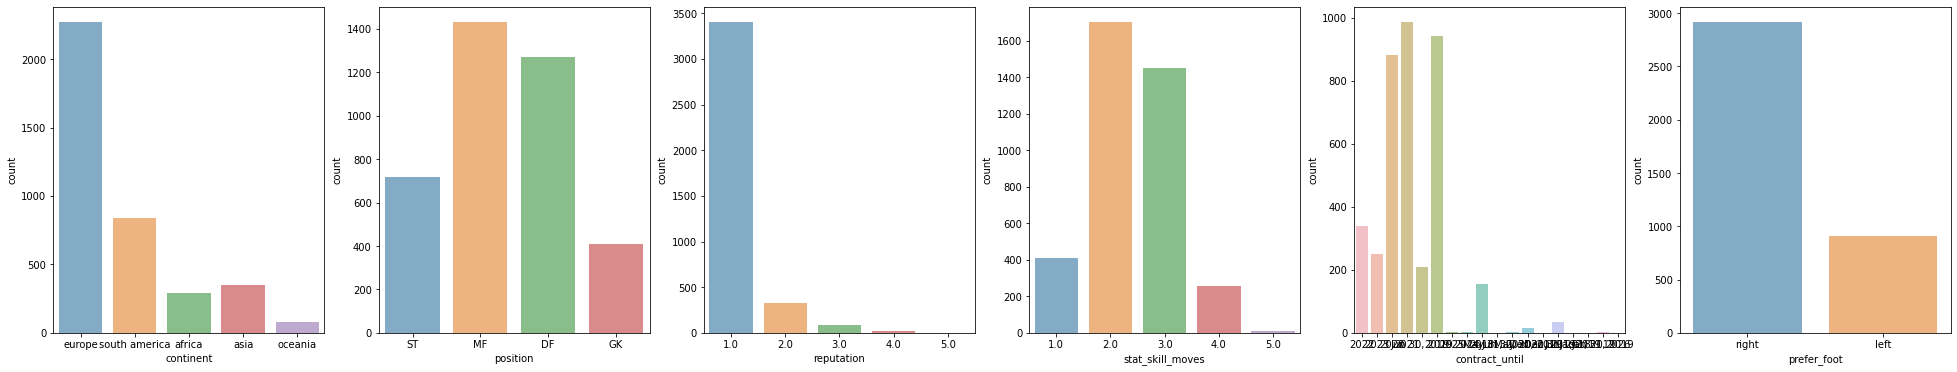

In [ ]:
f, axes = plt.subplots(1,len(noms), figsize=(34,6))
axes = axes.flatten()
for col,ax in zip(noms, axes):
    sns.countplot(data = df2, x=col, ax=ax, alpha=0.6,)
    # 범주값의 경우 countplot으로 만드는게 좋습니다.
plt.show()

* `hue` 옵션에 범주형 속성 추가하기

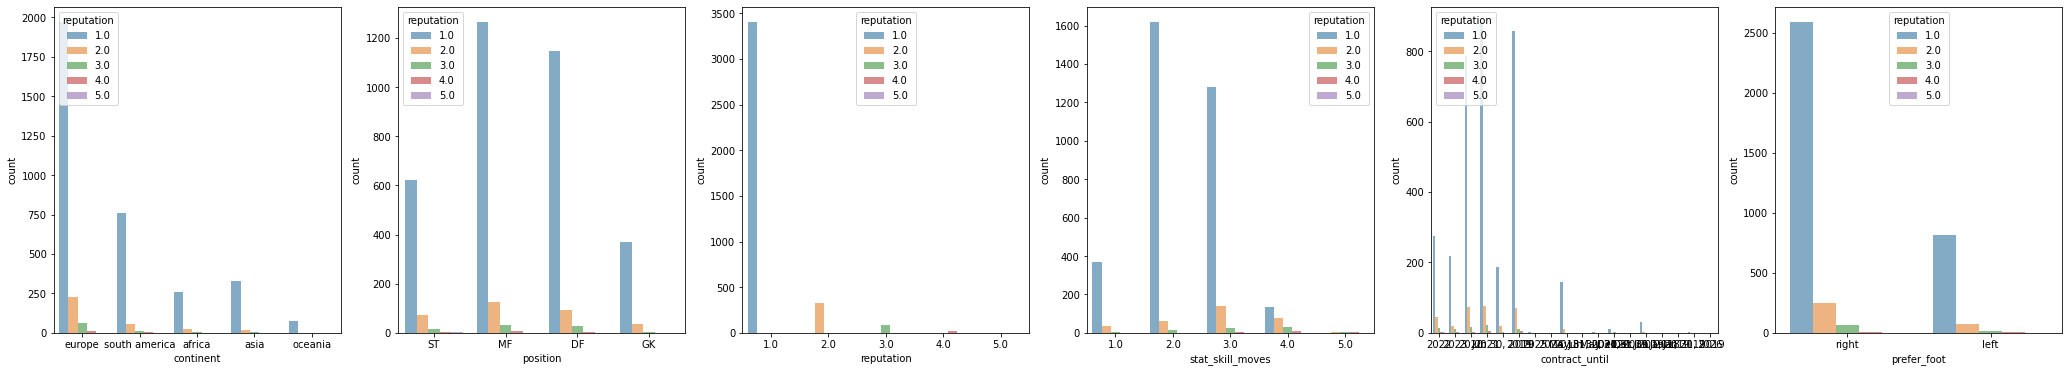

In [ ]:
f, axes = plt.subplots(1,len(noms), figsize=(36,6))
axes = axes.flatten()
for col,ax in zip(noms, axes):
    sns.countplot(data = df2, x=col, ax=ax, alpha=0.6,hue='reputation')
    # 범주값의 경우 countplot으로 만드는게 좋습니다.
plt.show()

##### 명성에 따른 분석을 진행하였습니다.

## 속성간 관계 파악
---

### **| 상관분석**

* `corr`를 이용해 상관계수 구하기

In [ ]:
df2.corr()

,id,age,reputation,stat_overall,stat_potential,stat_skill_moves
id,1.000000,-0.444101,-0.436237,-0.970117,-0.647958,-0.422232
age,-0.444101,1.000000,0.247366,0.432210,-0.245190,0.015834
reputation,-0.436237,0.247366,1.000000,0.548038,0.424418,0.258396
stat_overall,-0.970117,0.432210,0.548038,1.000000,0.687245,0.431102
stat_potential,-0.647958,-0.245190,0.424418,0.687245,1.000000,0.375556
stat_skill_moves,-0.422232,0.015834,0.258396,0.431102,0.375556,1.000000


In [ ]:
df2.corr().style.background_gradient(cmap='Blues')

,id,age,reputation,stat_overall,stat_potential,stat_skill_moves
id,1.000000,-0.444101,-0.436237,-0.970117,-0.647958,-0.422232
age,-0.444101,1.000000,0.247366,0.432210,-0.245190,0.015834
reputation,-0.436237,0.247366,1.000000,0.548038,0.424418,0.258396
stat_overall,-0.970117,0.432210,0.548038,1.000000,0.687245,0.431102
stat_potential,-0.647958,-0.245190,0.424418,0.687245,1.000000,0.375556
stat_skill_moves,-0.422232,0.015834,0.258396,0.431102,0.375556,1.000000


##### df 데이터를 분석을 하였을 땐, 명성, 현재 능력치 등이 비교적 중요한 사항들 이었습니다.
df2 그래프 에서는 현재폼과 포텐셜이 가장 높은 상관관계를 가지고, 명성과 현재 능력치가 뒤를 이어 좋은 상관관계를 가지고 있습니다.

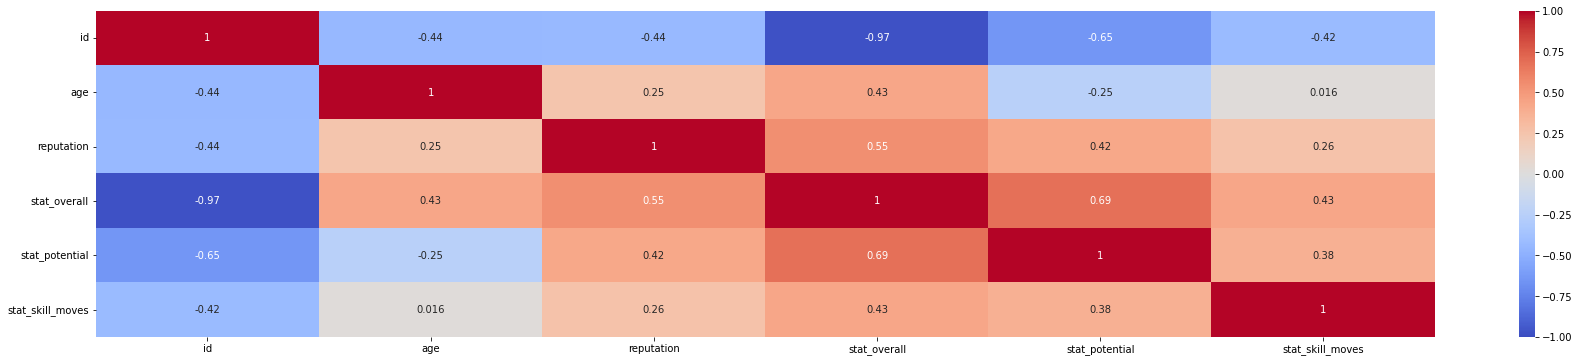

In [ ]:
plt.figure(figsize=(30,6))
sns.heatmap(df2.corr(), cmap='coolwarm', annot=True, vmin=-1, vmax=1)
plt.show()

### **| 속성간 관계 시각화**

* `pairplot` 이용해 시각화 하기

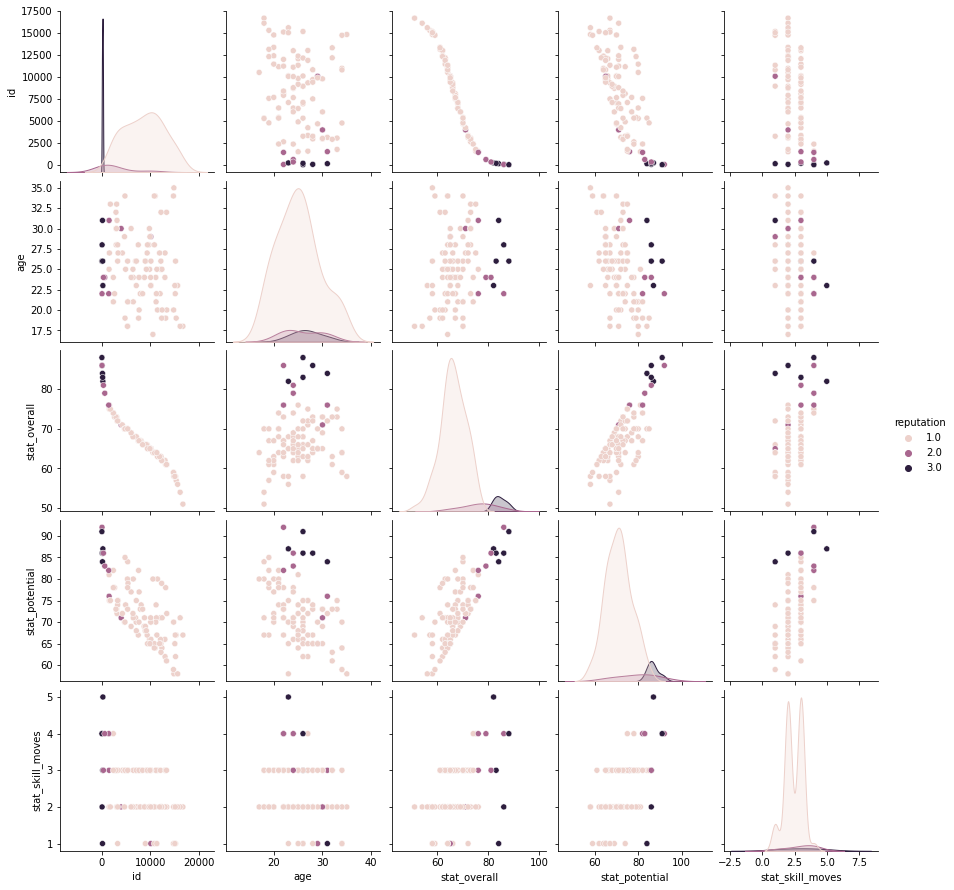

In [ ]:
sns.pairplot(df2.sample(100), hue='reputation')

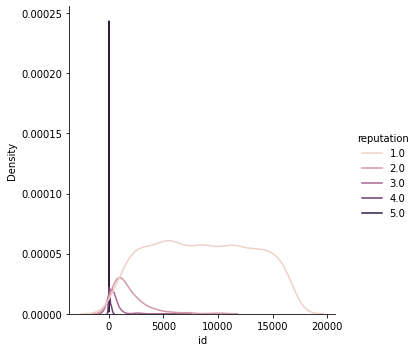

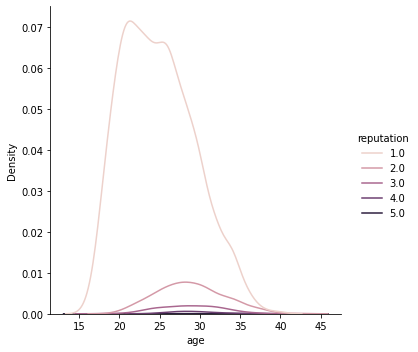

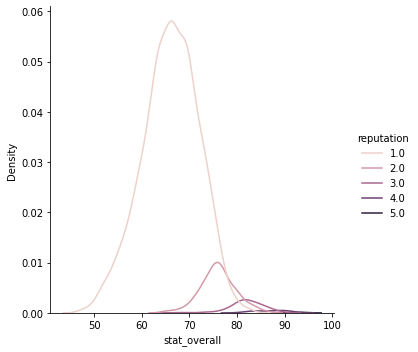

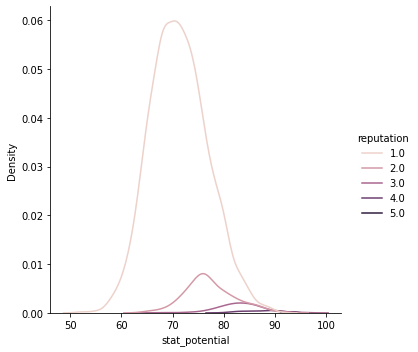

In [ ]:
for col in nums:
    sns.displot(data=df2, x=col, kind='kde',hue='reputation')
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


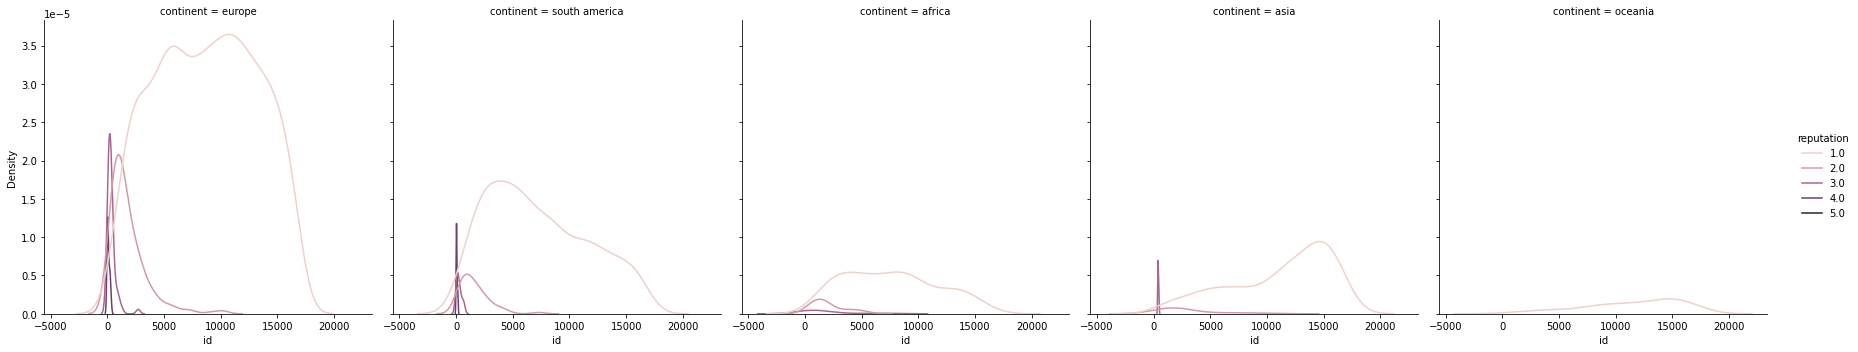

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


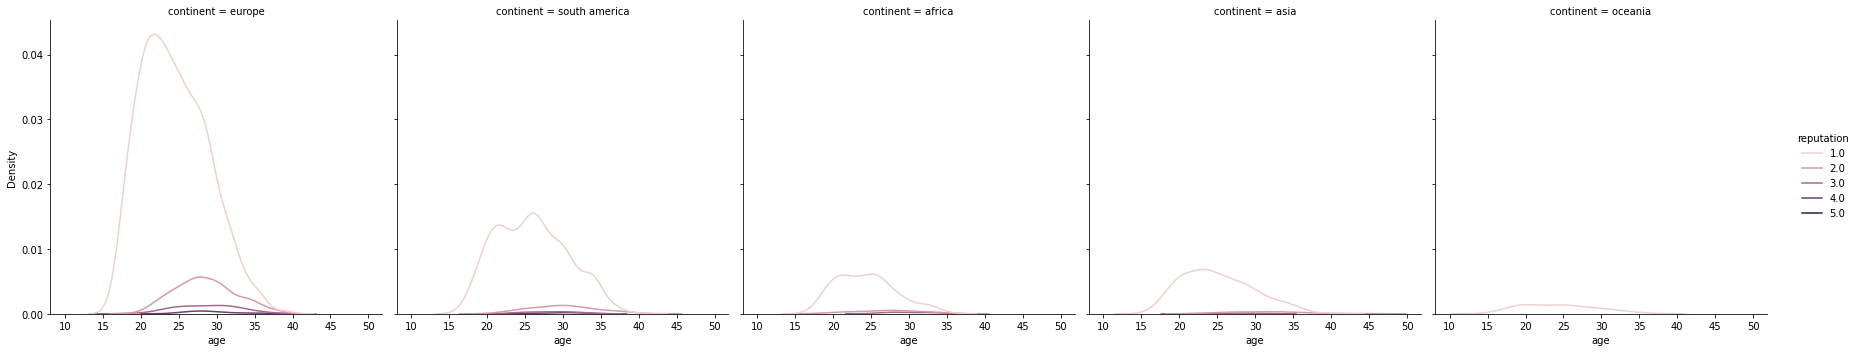

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


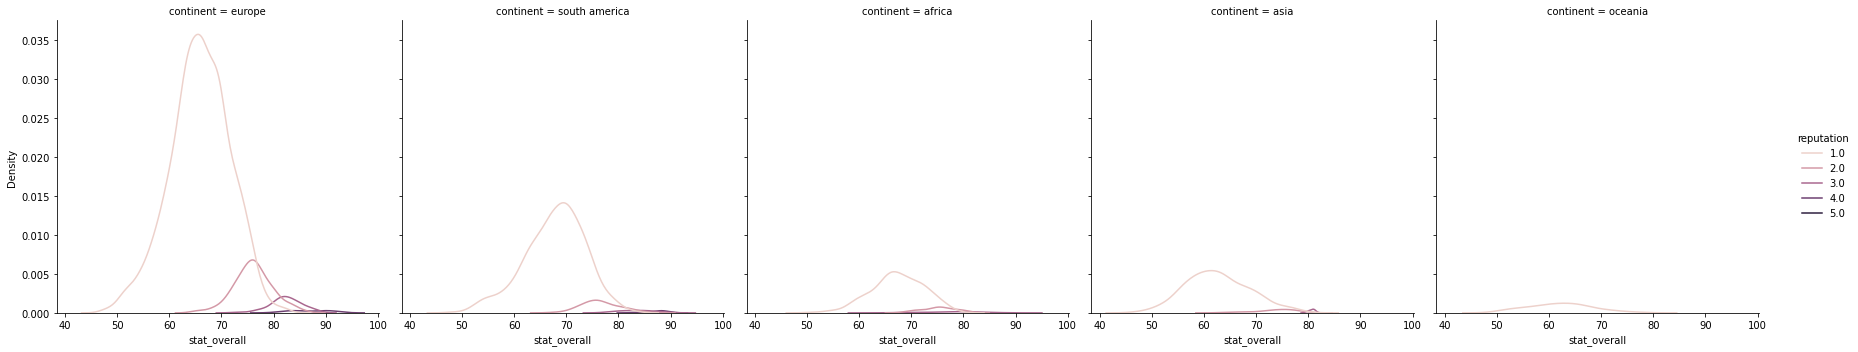

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


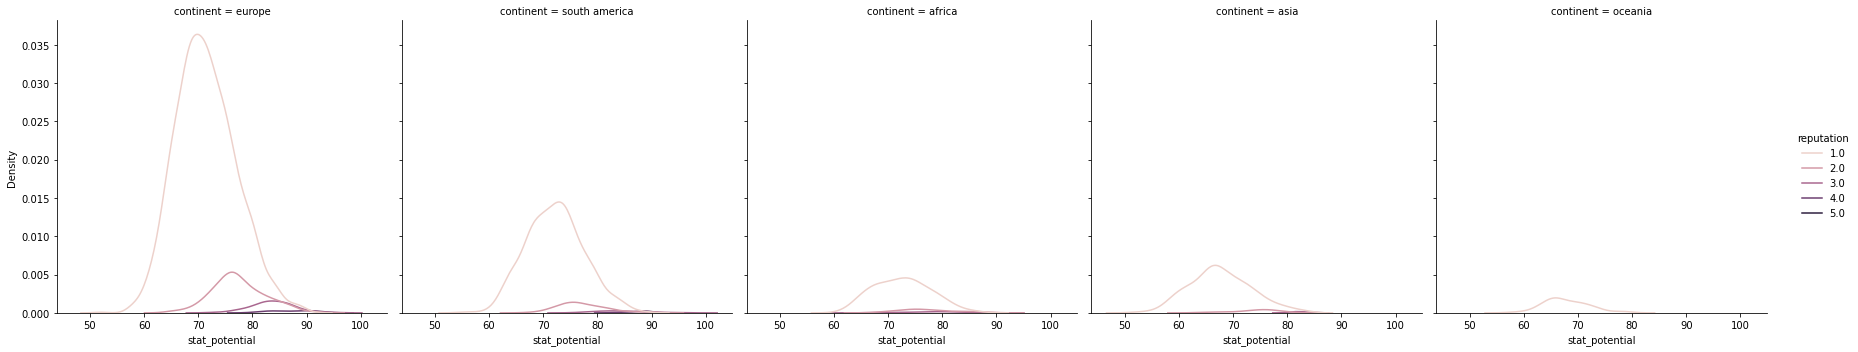

In [ ]:
for col in nums:
    sns.displot(data=df2, x=col, kind='kde',hue='reputation',col='continent')
    plt.show()

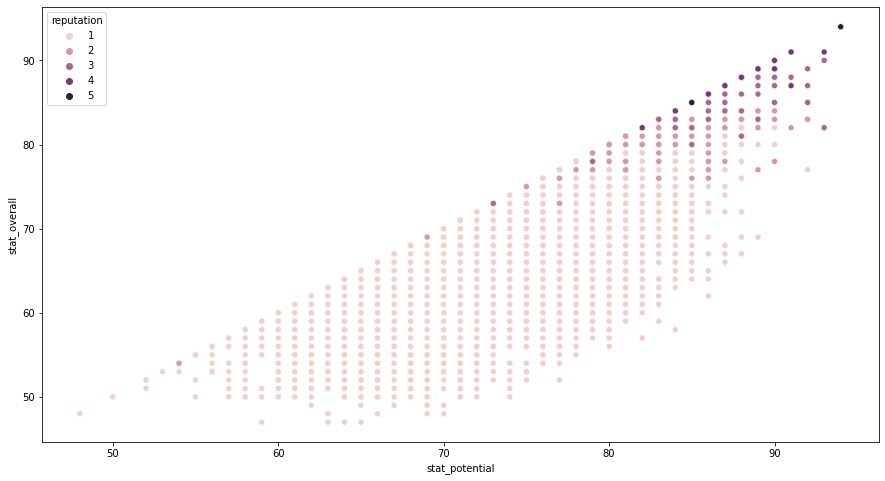

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df, x='stat_potential', y ='stat_overall',hue='reputation')

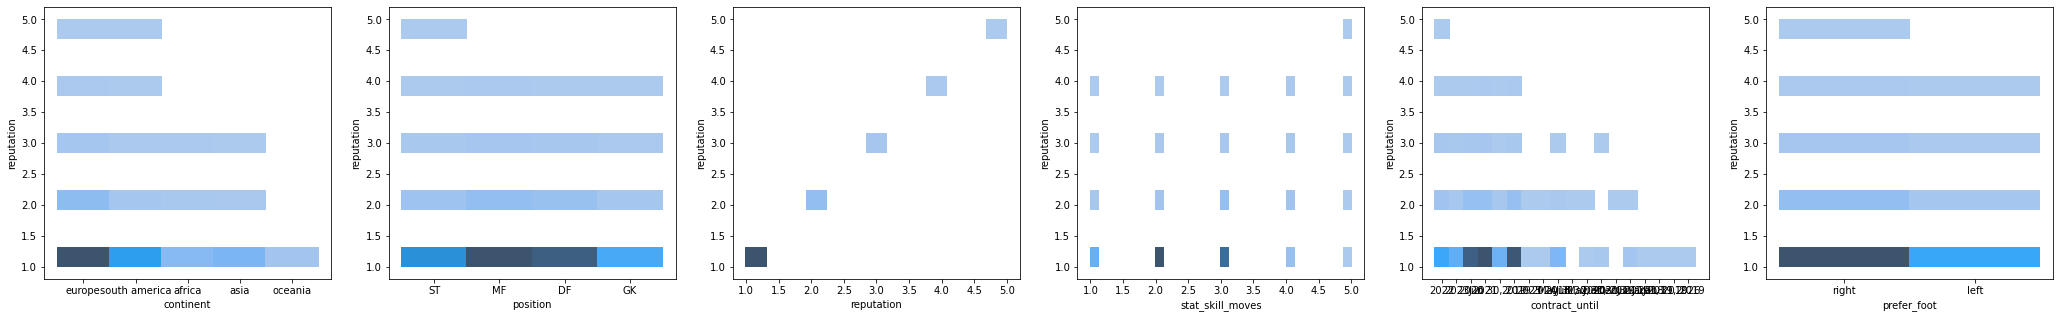

In [ ]:
fig, axes = plt.subplots(1, len(noms), figsize=(36,5))
for col, ax in zip(noms, axes):
    _=sns.histplot(data=df2, x=col, y='reputation' ,ax=ax)

<Figure size 1080x576 with 0 Axes>

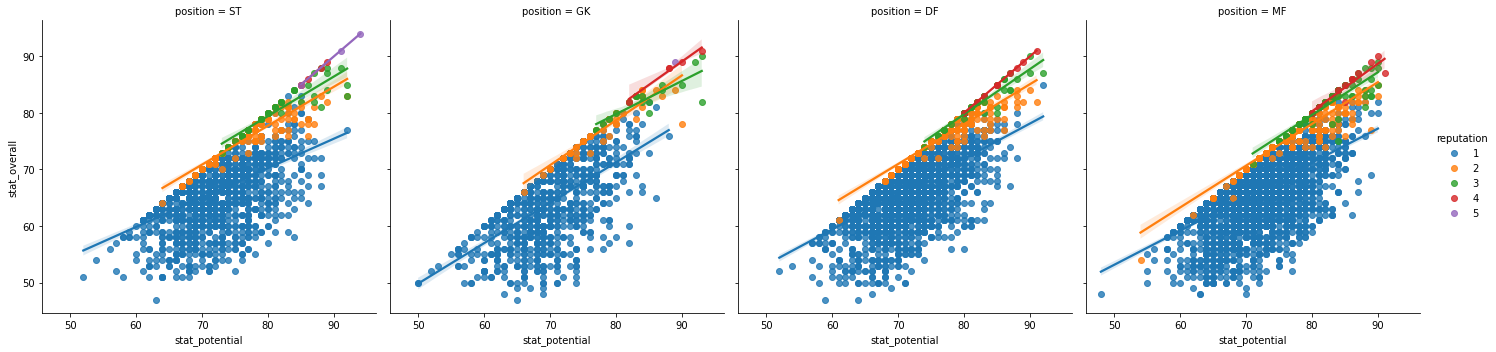

In [ ]:
plt.figure(figsize=(15,8))
sns.lmplot(data=df, x='stat_potential', y ='stat_overall',hue='reputation',col='position')
plt.show()

#### 앞선 데이터 자료에서 몸값에 가장 영향을 많이 끼치는 명성, 현재폼, 포텐셜 데이터를 한 곳에 모아 포지션별로 데이터를 만들었습니다. 명성이 낮음에도 불구하고, 명성이 좋은 선수 못지 않게 미래 포텐셜을 보여 줄 수 있는 선수들이 눈에 뜁니다. 역시는 역시 명성 4,5 정도의 유명한 선수들은 매우 관리가 잘 되어 있음을 한 눈에 알 수가 있습니다. 다음 시즌을 준비하는데에 있어 4,5 명성의 선수를 가지고 있는 팀은 선수가 우리 팀에서 뛸 수 있게 잘 잡아야 할테고, 중소클럽의 경우에는 명성은 낮지만, 우리 팀에 어울리는 포텐셜이 높은 선수를 잘 찾을 수 있도록 심혈을 기울여야 할 것 입니다.